#### IMPORTING THE LIBRARIES

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### IMPORTING THE DATA SET

In [191]:
#Importing the data
data = pd.read_csv('marathon.csv')
data.head()

C:\Users\gurjo\AppData\Local\Temp\ipykernel_17416\3561749941.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('marathon.csv')


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


##### STUDING THE DATA SET

In [192]:
data.shape

(7461195, 13)

In [193]:
data.columns

Index(['Year of event', 'Event dates', 'Event name', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete club',
       'Athlete country', 'Athlete year of birth', 'Athlete gender',
       'Athlete age category', 'Athlete average speed', 'Athlete ID'],
      dtype='object')

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


In [195]:
data['Event distance/length'].nunique()

2159

In [196]:
data['Event distance/length'].value_counts()

Event distance/length
50km              1522609
100km              951742
50mi               352181
56km               333253
87km               212062
                   ...   
61.15km                 1
27:30h                  1
178km/2Etappen          1
740km                   1
158.5mi                 1
Name: count, Length: 2159, dtype: int64

In [207]:
data['Year of event'].value_counts(sort=True)

Year of event
2019    732207
2018    661483
2017    604638
2016    540073
2015    480722
         ...  
1802         1
1800         1
1944         1
1893         1
1945         1
Name: count, Length: 146, dtype: int64

##### OBSERVATIONS
The data is very long with over 7461195 rows.<br>
    - There are 13 columns but we may not need all of them for our analysis.<br>
    - We will have to change the names of few columns to increase the quality of our analysis<br>
    - Many data types are either incorrect or not suitable for our analysis and we would have to change them                                                      

#### DATA CLEANING
-  we will only limit our analysis to only:<br> 
      - Events taking place in USA <br>
      - Events taking place in 2020<br>
      - Marathon distance 50km or 50mi

In [208]:
# data pertaining to races 50km or 50mi long
data[data['Event distance/length'].isin(['50km','50mi'])]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [209]:
# data pertaining to year 2020
data[data['Year of event']==2020]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2538401,2020,07.-08.02.2020,Taipei 48hr Ultra Marathon - 24h Split (TPE),24h,38,219.453 km,日本隊,JPN,1965.0,M,M50,9.144,53107
2538402,2020,07.-08.02.2020,Taipei 48hr Ultra Marathon - 24h Split (TPE),24h,38,202.878 km,NaN,TPE,1964.0,M,M55,8.453,4485
2538403,2020,07.-08.02.2020,Taipei 48hr Ultra Marathon - 24h Split (TPE),24h,38,194.259 km,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,8.094,63964
2538404,2020,07.-08.02.2020,Taipei 48hr Ultra Marathon - 24h Split (TPE),24h,38,190.944 km,NaN,TPE,1968.0,M,M50,7.956,17434
2538405,2020,07.-08.02.2020,Taipei 48hr Ultra Marathon - 24h Split (TPE),24h,38,186.303 km,日本隊,JPN,1960.0,M,M60,7.763,50665
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762599,2020,03.10.2020,A Stroll in The Park 12-Hour Endurance Run (USA),12h,11,64.743 km,"*Roswell, GA",USA,1956.0,F,W60,5.395,357456
2762600,2020,03.10.2020,A Stroll in The Park 12-Hour Endurance Run (USA),12h,11,61.927 km,"*Atlanta, GA",USA,1980.0,M,M35,5.161,485301
2762601,2020,03.10.2020,A Stroll in The Park 12-Hour Endurance Run (USA),12h,11,52.078 km,"*Alpharetta, GA",USA,1946.0,M,M70,4.34,385583
2762602,2020,03.10.2020,A Stroll in The Park 12-Hour Endurance Run (USA),12h,11,52.078 km,"*Marietta, GA",USA,1952.0,F,W65,4.34,264664


In [210]:
# data with events that took place in USA only
data[data['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)=='USA']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [215]:
##### Combining all the conditions
df=data[(data['Year of event']==2020) & (data['Event distance/length'].isin(['50km','50mi'])) & (data['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)=='USA')].copy()
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [216]:
df.shape

(26090, 13)

##### Our dataset now has the desired metrics and has been reduced to 26K rows. 

##### Since, the data has been limited to the events in USA, we can remove "USA" from the name of the events.

In [217]:
df['Event name']=df['Event name'].str.split('(').str.get(0)
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [219]:
df.isna().sum()

Year of event                   0
Event dates                     0
Event name                      0
Event distance/length           0
Event number of finishers       0
Athlete performance             0
Athlete club                 3119
Athlete country                 0
Athlete year of birth         233
Athlete gender                  0
Athlete age category          217
Athlete average speed           0
Athlete ID                      0
dtype: int64

##### There are some columns with missing values that we may drop later

In [220]:
##### There are some missing entries in few columns, such as where year of birth is missing, so we will drop them
df.dropna(subset=['Athlete year of birth'],inplace=True)
df.isna().sum()

Year of event                   0
Event dates                     0
Event name                      0
Event distance/length           0
Event number of finishers       0
Athlete performance             0
Athlete club                 3023
Athlete country                 0
Athlete year of birth           0
Athlete gender                  0
Athlete age category            0
Athlete average speed           0
Athlete ID                      0
dtype: int64

In [221]:
df['Athlete year of birth']=df['Athlete year of birth'].astype('int64')
df.dtypes

Year of event                 int64
Event dates                  object
Event name                   object
Event distance/length        object
Event number of finishers     int64
Athlete performance          object
Athlete club                 object
Athlete country              object
Athlete year of birth         int64
Athlete gender               object
Athlete age category         object
Athlete average speed        object
Athlete ID                    int64
dtype: object

In [222]:
df['Age']=2020-df['Athlete year of birth']
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991,M,M23,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981,M,M35,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999,M,MU23,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983,M,M35,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977,M,M40,11.212,810281,43


In [223]:
# Dropping the columns that we do not need
df.drop(['Athlete club','Athlete year of birth','Athlete age category'],axis=1,inplace=True)
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,Age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,USA,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,USA,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,USA,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,USA,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,USA,M,11.212,810281,43


##### we will remove the letter 'h' from athletic performance

In [224]:
df['Athlete performance']=df['Athlete performance'].str.split(' ').str.get(0)
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,Age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,USA,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,USA,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,USA,M,11.212,810281,43


In [225]:
df.shape

(25857, 11)

In [226]:
df['Athlete average speed']=df['Athlete average speed'].astype('float64')
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete country               object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
Age                            int64
dtype: object

##### We will rename the columns to make them more informative, useful and meaningful

In [227]:
df.rename(columns={'Year of event':'year', 'Event dates':'date', 'Event name':'event', 'Event distance/length':'length',
       'Event number of finishers':'total_finishers', 'Athlete performance':'performance', 'Athlete country':'country',
       'Athlete gender':'gender', 'Athlete average speed':'average_speed', 'Athlete ID':'athlete_id'},inplace=True)
df.head()

,year,date,event,length,total_finishers,performance,country,gender,average_speed,athlete_id,Age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,USA,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,USA,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,USA,M,11.212,810281,43


#### Exploratory Data Analysis

In [228]:
# Calculate the distribution of race lengths
df.length.value_counts()

length
50km    20230
50mi     5627
Name: count, dtype: int64

C:\Users\gurjo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='length', ylabel='Count'>

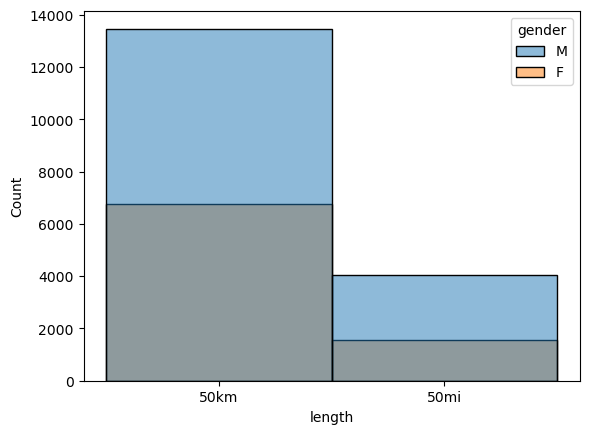

In [229]:
#Plot the districution and differentiate based on gender
sns.histplot(x=df.length,hue=df.gender)

C:\Users\gurjo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


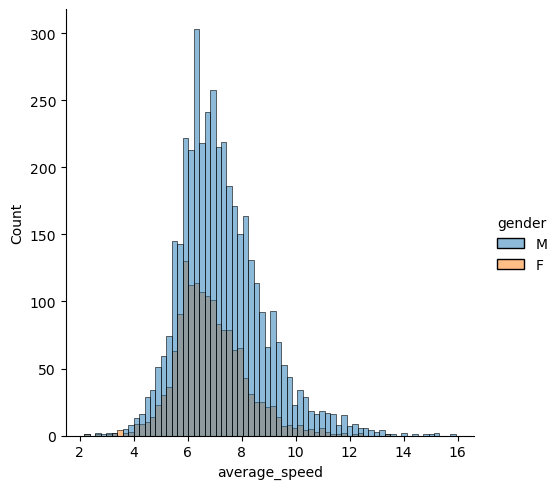

In [230]:
sns.displot(x=df[df['length']=='50mi']['average_speed'],hue=df.gender)

<Axes: xlabel='length', ylabel='average_speed'>

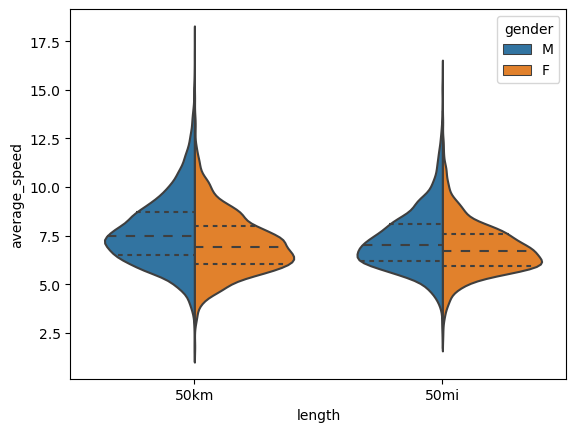

In [231]:
sns.violinplot(data=df,x='length',y='average_speed',hue='gender',split=True,inner='quart',lw=3)

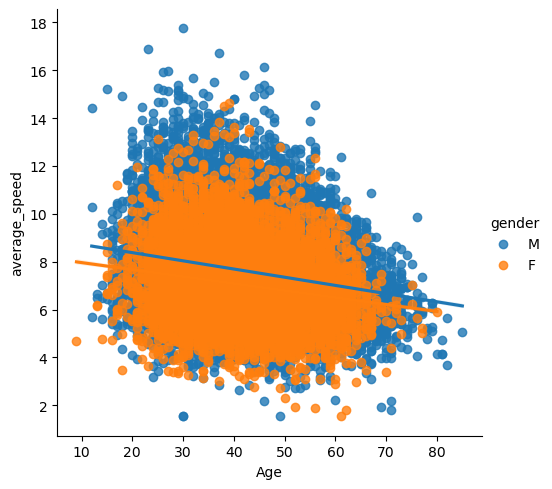

In [232]:
# Study the relationship between athlete age and the average speed
sns.lmplot(data=df,x='Age',y='average_speed',hue='gender')

In [233]:
# Difference in speed for length and genders
df.groupby(['length','gender'])['average_speed'].mean()

length  gender
50km    F         7.083011
        M         7.738985
50mi    F         6.834371
        M         7.257633
Name: average_speed, dtype: float64

In [234]:
# What age groups are the best in 50mi race (at least 20+ runs)
df.query('length=="50mi"').groupby('Age')['average_speed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count > 19').head()

,mean,count
Age,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91


In [235]:
# What age groups are the worst in 50mi race (at least 10+ runs)
df.query('length=="50mi"').groupby('Age')['average_speed'].agg(['mean','count']).sort_values('mean',ascending=True).query('count > 9').head()

,mean,count
Age,,
70,5.470667,12
65,5.934786,14
68,5.957500,10
67,6.114909,11
66,6.194300,10


In [236]:
# Compare the average speeds for different times of the year, such as spring, summer, winter and fall
# We will firstly derive the month from the date column
df['race_month']=df['date'].str.split('.').str.get(1).astype(int)
df.head()

,year,date,event,length,total_finishers,performance,country,gender,average_speed,athlete_id,Age,race_month
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,M,15.158,71287,29,2
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,M,12.369,629508,39,2
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,USA,M,12.099,64838,21,2
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,USA,M,11.449,704450,37,2
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,USA,M,11.212,810281,43,2


In [237]:
# then we will assign the season based on what month it is.
df['season']=df['race_month'].apply(lambda x:'winter' if x > 11 else 'Fall' if x > 8 else 'summer' if x > 5 else 'spring' if x > 2 else 'winter' )
df.head()

,year,date,event,length,total_finishers,performance,country,gender,average_speed,athlete_id,Age,race_month,season
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,M,15.158,71287,29,2,winter
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,M,12.369,629508,39,2,winter
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,USA,M,12.099,64838,21,2,winter
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,USA,M,11.449,704450,37,2,winter
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,USA,M,11.212,810281,43,2,winter


In [238]:
# finally we will compare the average speed based on the month
df.groupby(['season'])['average_speed'].agg(['mean','count']).sort_values('mean',ascending=False)

,mean,count
season,,
spring,7.684430,3294
winter,7.518187,11595
Fall,7.406619,8315
summer,6.869336,2653


In [239]:
# same query but for 50mi race only
df.query('length =="50mi"').groupby(['season'])['average_speed'].agg(['mean','count']).sort_values('mean',ascending=False)

,mean,count
season,,
Fall,7.511585,1997
spring,7.082557,836
winter,7.048442,1977
summer,6.505776,817


#### OBSERVATIONS 
<br>
    - Males have higher average speed in both the categories. <br>
    - Age 29 has the best performance when meaured based on average speed and at least 20 races run <br>
    - Age 72 understandably has the worst performance.<br>
    - Spring sees the best average speed while summer being the hottest sees the lowest average speed
